In [1]:
import math
import numpy as np
import os
import pandas as pd

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA

In [2]:
def get_lines_from_file(filename):
    f=open(filename)
    lines=[x.strip() for x in f]
    f.close()
    return lines

In [3]:
rgbWords  = ['yellow','blue','purple', 'orange','red','green']
shapeWords  = ['cylinder','cube', 'triangle','triangular','rectangular']
objWords = ['cylinder', 'apple','carrot', 'lime','lemon','orange', 'banana','cube', 'triangle', 'corn','cucumber', 'half', 'cabbage', 'ear', 'tomato', 'potato', 'cob','eggplant']

In [4]:
def get_deviations(filename,words):
    lines=get_lines_from_file("/Users/adithyabandi/_True_True_90_25_rgb_0_min_max.txt")
    tokens=[]
    mins=[]
    maxs=[]
    reqmins=[]
    reqmaxs=[]
    for line in lines:
        temp=line.split("_")
        tokens.append(temp[1])
        mins.append(temp[3])
        maxs.append(temp[5])
    for i in range(len(tokens)):
        if tokens[i] in words:
            reqmins.append(mins[i])
            reqmaxs.append(maxs[i])
    return reqmins,reqmaxs    

In [5]:
def get_report(filename):
    lines=get_lines_from_file(filename)
    j=0
    types=[]
    estops=[]
    sorts=[]
    pre_thres=[]
    rec_thres=[]
    split=[]
    acc=[]
    pre=[]
    rec=[]
    f1=[]
    min_means=[]
    min_medians=[]
    min_std_devs=[]
    max_means=[]
    max_medians=[]
    max_std_devs=[]
    i=0
    while i<len(lines):
        mins_agg=[]
        maxs_agg=[]
        for counter in range(4):
            mins_str=lines[i].split("]")[0].split("[")[1].split(",")
            mins=[float(per_min) for per_min in mins_str]
            for mini in mins:
                mins_agg.append(mini)
            i+=1
            maxs_str=lines[i].split("]")[0].split("[")[1].split(",")
            maxs=[float(per_max) for per_max in maxs_str]
            for maxi in maxs:
                maxs_agg.append(maxi)
            i+=1
            g=lines[i]
            temp=g.split("-")
            sorts.append(temp[0])
            types.append(temp[1])
            estops.append(temp[2])
            pre_thres.append(temp[3])
            rec_thres.append(temp[4])
            split.append(temp[5])
            i+=2
            acc.append(float(lines[i])*100)
            i+=1
            f1.append(float(lines[i])*100)
            i+=1
            pre.append(float(lines[i])*100)
            i+=1
            rec.append(float(lines[i])*100)
            i+=1
            j+=1
            i+=1
        for counter in range(4):
            min_means.append(np.mean(mins_agg))
            min_medians.append(np.median(mins_agg))
            min_std_devs.append(np.std(mins_agg))
            max_means.append(np.mean(maxs_agg))
            max_medians.append(np.median(maxs_agg))
            max_std_devs.append(np.std(maxs_agg))
        
    Results=pd.DataFrame({'type':types,'early_stop':estops,
                      'pre_threshold':pre_thres,
                       'rec_threshold':rec_thres,'instances_sorted':sorts,
                          'precision':pre,'recall':rec,
                        'f1_score':f1,
                       'split':split,'accuracy':acc,
                       "mean_min_dissim_":min_means,"median_min_dissim_":min_medians,
                        "std_dev_min_dissim_":min_std_devs,
                        "mean_max_dissim_":max_means,
                        "median_max_dissim_":max_medians,
                        "std_dev_max_dissim_":max_std_devs})
    return Results

In [6]:
Results=get_report("/Users/adithyabandi/AllExecutionIV.csv")
#Results

In [7]:
Results=Results[['instances_sorted','early_stop','type','split','pre_threshold', 'rec_threshold', 
                'f1_score','precision','recall','accuracy', 'mean_max_dissim_', 'mean_min_dissim_', 
                'median_max_dissim_','median_min_dissim_','std_dev_max_dissim_', 'std_dev_min_dissim_']]

In [8]:
#Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold']).mean().sort_values(by=["f1_score"],ascending=False)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
def display_results(Results,feature_type,early_stop,instance_sort):
    object_Results=Results[Results.type==feature_type]
    object_Results=object_Results[object_Results.early_stop==early_stop]
    object_Results=object_Results[object_Results.instances_sorted==instance_sort]
    object_Results_grouped=object_Results.groupby(["instances_sorted",'early_stop','type','pre_threshold','rec_threshold'])
    display(object_Results_grouped.mean().sort_values(by=["f1_score"],ascending=False))
    object_Results_grouped_df=object_Results_grouped.aggregate(np.mean)
    object_Results_grouped_df=object_Results_grouped_df.reset_index()
    data_pivoted = object_Results_grouped_df[(object_Results_grouped_df.early_stop==early_stop) & (object_Results_grouped_df.instances_sorted==instance_sort)].pivot("pre_threshold", "rec_threshold", "f1_score")
    ax = sns.heatmap(data_pivoted)
    plt.show()

With instances sorted as True
With Early Stop set as True
rgb results:


f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             90.087302   
                                               50             88.685516   
                                 25            25             87.693452   
                                               50             86.163690   
                                 75            25             82.781746   
                                               50             82.487103   
                                 90            25             80.173611   
                                 50            75             78.535714   
                                 25            75             77.629960   
                                 90            50             77.295635   
                                 50            90             70.580357   
                                 75            75             69.982143   
                                 25            90             69.490079   
                                 90            75             62.503968   
                                 75            90             62.347222   
                                 90            90             60.507937   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             92.284722   
                                               50             91.583333   
                                 25            25             89.527778   
                                               50             87.854167   
                                 75            25             78.520833   
                                               50             77.736111   
                                 90            25             73.604167   
                                 50            75             78.673611   
                                 25            75             77.159722   
                                 90            50             68.784722   
                                 50            90             68.979167   
                                 75            75             65.097222   
                                 25            90             67.027778   
                                 90            75             55.784722   
                                 75            90             57.458333   
                                 90            90             53.000000   

                                                                 recall  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             True       rgb  50            25             91.111111   
                                               50             88.819444   
                                 25            25             90.069444   
                                               50             87.986111   
                                 75            25             96.250000   
                                               50             97.083333   
                                 90            25             98.055556   
                                 50            75             80.555556   
                                 25            75             80.694444   
                                 90            50             98.819444   
                                 50            90             76.527778   
                                 75            75             81.944444   
                                 25            90             76.111111   
                                 90            75             81.805556   
                                 75            90             76.597222   
                                 90            90             78.333333   

          

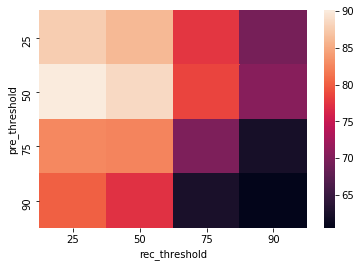

With instances sorted as True
With Early Stop set as False
rgb results:


f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  25            75             92.355159   
                                 50            75             91.363095   
                                 75            25             90.607143   
                                               50             90.037698   
                                 50            90             89.390873   
                                               25             89.318452   
                                               50             88.966270   
                                 25            50             88.777778   
                                               25             88.426587   
                                               90             88.053571   
                                 75            75             86.428571   
                                               90             84.019841   
                                 90            25             82.265873   
                                               50             81.530754   
                                               75             75.364087   
                                               90             72.142857   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  25            75             93.451389   
                                 50            75             91.930556   
                                 75            25             89.895833   
                                               50             89.069444   
                                 50            90             88.534722   
                                               25             91.576389   
                                               50             91.097222   
                                 25            50             90.500000   
                                               25             90.805556   
                                               90             86.541667   
                                 75            75             83.673611   
                                               90             78.666667   
                                 90            25             77.284722   
                                               50             75.777778   
                                               75             71.333333   
                                               90             67.750000   

                                                                 recall  \
instances_sorted early_stop type pre_threshold rec_threshold              
True             False      rgb  25            75             93.750000   
                                 50            75             93.888889   
                                 75            25             94.930556   
                                               50             94.722222   
                                 50            90             94.236111   
                                               25             90.138889   
                                               50             90.694444   
                                 25            50             90.763889   
                                               25             89.861111   
                                               90             93.819444   
                                 75            75             95.000000   
                                               90             96.597222   
                                 90            25             97.013889   
                                               50             97.500000   
                                               75             88.958333   
                                               90             87.152778   

          

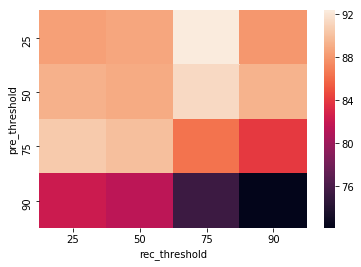

With instances sorted as False
With Early Stop set as True
rgb results:


f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             90.595238   
                                 25            25             88.545635   
                                 75            25             86.525794   
                                 50            50             83.434524   
                                 75            50             82.781746   
                                 25            50             81.216270   
                                 90            25             78.711310   
                                               50             76.970238   
                                 75            75             72.160714   
                                 50            75             71.057540   
                                 90            75             63.476190   
                                 25            75             61.488095   
                                 75            90             52.909722   
                                 90            90             52.643849   
                                 50            90             49.958333   
                                 25            90             49.809524   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             91.062500   
                                 25            25             90.500000   
                                 75            25             82.479167   
                                 50            50             85.451389   
                                 75            50             78.166667   
                                 25            50             84.756944   
                                 90            25             70.812500   
                                               50             69.590278   
                                 75            75             67.180556   
                                 50            75             69.305556   
                                 90            75             56.861111   
                                 25            75             58.430556   
                                 75            90             48.166667   
                                 90            90             48.555556   
                                 50            90             47.152778   
                                 25            90             48.326389   

                                                                 recall  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            True       rgb  50            25             93.888889   
                                 25            25             90.347222   
                                 75            25             97.569444   
                                 50            50             85.138889   
                                 75            50             94.375000   
                                 25            50             80.208333   
                                 90            25             97.847222   
                                               50             96.736111   
                                 75            75             85.625000   
                                 50            75             78.750000   
                                 90            75             81.597222   
                                 25            75             70.138889   
                                 75            90             65.208333   
                                 90            90             63.958333   
                                 50            90             57.222222   
                                 25            90             56.250000   

          

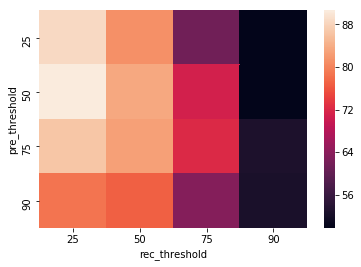

With instances sorted as False
With Early Stop set as False
rgb results:


f1_score  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  75            25             93.976190   
                                 25            75             91.007937   
                                               50             89.888889   
                                 50            50             89.503968   
                                               25             88.709325   
                                 25            25             88.615079   
                                 75            50             87.798611   
                                 50            75             87.525794   
                                 75            75             85.969246   
                                 90            50             84.958333   
                                               25             82.352183   
                                 50            90             81.330357   
                                 75            90             80.489087   
                                 25            90             79.357143   
                                 90            90             66.815476   
                                               75             65.417659   

                                                              precision  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  75            25             94.722222   
                                 25            75             90.881944   
                                               50             92.236111   
                                 50            50             91.500000   
                                               25             90.743056   
                                 25            25             90.361111   
                                 75            50             87.173611   
                                 50            75             88.263889   
                                 75            75             83.520833   
                                 90            50             84.062500   
                                               25             77.451389   
                                 50            90             77.590278   
                                 75            90             79.659722   
                                 25            90             73.840278   
                                 90            90             60.937500   
                                               75             59.583333   

                                                                 recall  \
instances_sorted early_stop type pre_threshold rec_threshold              
False            False      rgb  75            25             95.486111   
                                 25            75             94.305556   
                                               50             90.555556   
                                 50            50             90.347222   
                                               25             89.930556   
                                 25            25             90.138889   
                                 75            50             94.166667   
                                 50            75             91.805556   
                                 75            75             92.638889   
                                 90            50             90.625000   
                                               25             95.555556   
                                 50            90             92.500000   
                                 75            90             86.111111   
                                 25            90             92.361111   
                                 90            90             82.222222   
                                               75             80.277778   

          

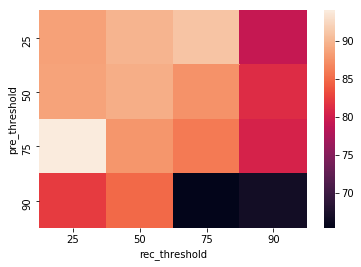

With instances sorted as True
With Early Stop set as True
shape results:


f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 25            75             78.623810   
                                                50             76.433333   
                                                25             75.916667   
                                  75            75             75.266667   
                                                50             75.173810   
                                  50            25             74.511905   
                                                75             74.066667   
                                                50             73.711905   
                                  90            25             72.891667   
                                  75            25             72.733333   
                                  90            75             72.530952   
                                                50             70.955952   
                                  25            90             69.314286   
                                  50            90             67.511905   
                                  90            90             65.938095   
                                  75            90             63.821429   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 25            75             88.416667   
                                                50             85.666667   
                                                25             86.333333   
                                  75            75             83.333333   
                                                50             85.750000   
                                  50            25             86.291667   
                                                75             83.250000   
                                                50             83.041667   
                                  90            25             73.708333   
                                  75            25             83.000000   
                                  90            75             72.700000   
                                                50             72.133333   
                                  25            90             69.908333   
                                  50            90             69.433333   
                                  90            90             63.775000   
                                  75            90             66.450000   

                                                                  recall  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             True       shape 25            75             74.583333   
                                                50             71.416667   
                                                25             71.000000   
                                  75            75             71.166667   
                                                50             70.583333   
                                  50            25             68.916667   
                                                75             70.083333   
                                                50             69.833333   
                                  90            25             82.000000   
                                  75            25             67.750000   
                                  90            75             82.500000   
                                                50             80.000000   
                                  25            90             78.000000   
                                  50            90             73.750000   
                                  90            90             80.250000   
                                  

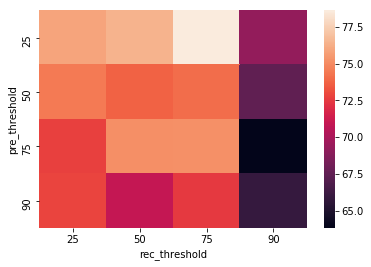

With instances sorted as True
With Early Stop set as False
shape results:


f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            50             78.183333   
                                  25            90             76.883333   
                                                50             76.750000   
                                  50            75             76.716667   
                                  90            50             76.196429   
                                  25            25             76.100000   
                                  90            75             75.253571   
                                  50            90             75.200000   
                                  75            25             74.383333   
                                  50            25             74.211905   
                                  75            75             72.900000   
                                  90            25             72.865476   
                                  50            50             72.845238   
                                  90            90             72.264286   
                                  75            90             71.480952   
                                  25            75             70.916667   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            50             87.916667   
                                  25            90             85.250000   
                                                50             87.666667   
                                  50            75             86.416667   
                                  90            50             84.458333   
                                  25            25             86.416667   
                                  90            75             83.641667   
                                  50            90             85.000000   
                                  75            25             84.333333   
                                  50            25             83.875000   
                                  75            75             83.583333   
                                  90            25             79.383333   
                                  50            50             84.291667   
                                  90            90             79.258333   
                                  75            90             82.708333   
                                  25            75             81.916667   

                                                                  recall  \
instances_sorted early_stop type  pre_threshold rec_threshold              
True             False      shape 75            50             73.416667   
                                  25            90             72.916667   
                                                50             71.333333   
                                  50            75             72.250000   
                                  90            50             73.583333   
                                  25            25             71.500000   
                                  90            75             74.666667   
                                  50            90             70.250000   
                                  75            25             69.583333   
                                  50            25             69.916667   
                                  75            75             68.083333   
                                  90            25             72.916667   
                                  50            50             67.833333   
                                  90            90             71.333333   
                                  75            90             66.583333   
                                  

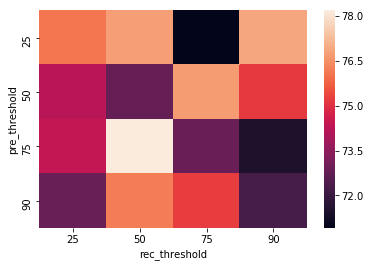

With instances sorted as False
With Early Stop set as True
shape results:


f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 50            25             76.716667   
                                  75            75             76.590476   
                                  25            50             75.450000   
                                  50            75             75.236905   
                                  25            25             74.566667   
                                  75            50             74.544048   
                                  50            50             73.750000   
                                  90            50             73.235714   
                                                75             71.341667   
                                  75            25             70.878571   
                                  25            75             70.452381   
                                                90             67.152381   
                                  90            25             66.715476   
                                  75            90             62.746429   
                                  50            90             61.757143   
                                  90            90             59.401190   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 50            25             86.083333   
                                  75            75             84.850000   
                                  25            50             85.666667   
                                  50            75             83.633333   
                                  25            25             84.166667   
                                  75            50             80.858333   
                                  50            50             82.500000   
                                  90            50             74.416667   
                                                75             74.225000   
                                  75            25             80.500000   
                                  25            75             80.875000   
                                                90             67.375000   
                                  90            25             70.725000   
                                  75            90             63.091667   
                                  50            90             63.308333   
                                  90            90             57.583333   

                                                                  recall  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            True       shape 50            25             72.250000   
                                  75            75             74.000000   
                                  25            50             70.333333   
                                  50            75             73.250000   
                                  25            25             70.083333   
                                  75            50             72.833333   
                                  50            50             69.583333   
                                  90            50             80.500000   
                                                75             76.750000   
                                  75            25             67.416667   
                                  25            75             66.583333   
                                                90             74.666667   
                                  90            25             72.500000   
                                  75            90             69.416667   
                                  50            90             68.083333   
                                  

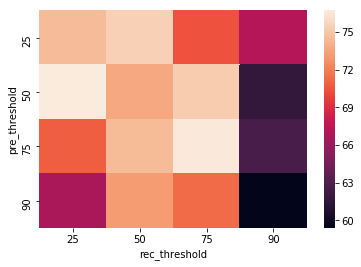

With instances sorted as False
With Early Stop set as False
shape results:


f1_score  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 50            50             78.500000   
                                  90            50             78.178571   
                                                25             77.720238   
                                  50            90             77.569048   
                                                25             76.550000   
                                  25            75             76.366667   
                                                90             76.315476   
                                  75            25             75.500000   
                                                50             75.195238   
                                  25            25             75.000000   
                                  75            90             74.945238   
                                  50            75             74.916667   
                                  75            75             74.450000   
                                  90            75             74.152381   
                                  25            50             72.628571   
                                  90            90             71.575000   

                                                               precision  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 50            50             88.000000   
                                  90            50             85.541667   
                                                25             84.391667   
                                  50            90             88.000000   
                                                25             85.666667   
                                  25            75             86.333333   
                                                90             84.383333   
                                  75            25             86.500000   
                                                50             85.291667   
                                  25            25             85.916667   
                                  75            90             85.708333   
                                  50            75             84.333333   
                                  75            75             83.666667   
                                  90            75             78.975000   
                                  25            50             82.708333   
                                  90            90             76.150000   

                                                                  recall  \
instances_sorted early_stop type  pre_threshold rec_threshold              
False            False      shape 50            50             74.166667   
                                  90            50             76.416667   
                                                25             77.666667   
                                  50            90             73.583333   
                                                25             71.916667   
                                  25            75             71.583333   
                                                90             73.416667   
                                  75            25             70.250000   
                                                50             70.250000   
                                  25            25             69.583333   
                                  75            90             71.000000   
                                  50            75             70.666667   
                                  75            75             70.583333   
                                  90            75             76.000000   
                                  25            50             67.750000   
                                  

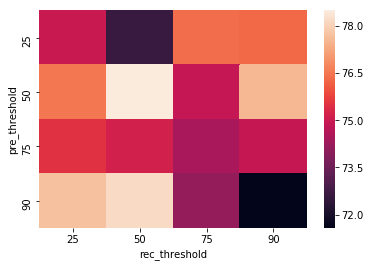

With instances sorted as True
With Early Stop set as True
object results:


f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            75             68.702381   
                                   50            50             67.854167   
                                                 75             67.699033   
                                   75            25             67.163690   
                                   25            50             66.520833   
                                   50            90             66.369420   
                                   90            90             66.321429   
                                                 50             66.222098   
                                                 25             66.206473   
                                   75            75             65.896205   
                                   25            25             65.595982   
                                   75            50             65.382440   
                                   25            75             64.356399   
                                   50            25             63.959077   
                                   75            90             63.789807   
                                   25            90             63.023065   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            75             75.247396   
                                   50            50             78.593750   
                                                 75             77.723958   
                                   75            25             77.968750   
                                   25            50             77.447917   
                                   50            90             76.156250   
                                   90            90             72.197917   
                                                 50             72.835938   
                                                 25             72.609375   
                                   75            75             76.187500   
                                   25            25             76.302083   
                                   75            50             76.875000   
                                   25            75             74.427083   
                                   50            25             74.414062   
                                   75            90             73.140625   
                                   25            90             72.835938   

                                                                   recall  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             True       object 90            75             68.619792   
                                   50            50             62.864583   
                                                 75             63.619792   
                                   75            25             62.421875   
                                   25            50             61.770833   
                                   50            90             63.229167   
                                   90            90             67.734375   
                                                 50             66.041667   
                                                 25             66.145833   
                                   75            75             61.875000   
                                   25            25             60.781250   
                                   75            50             60.546875   
                                   25            75             60.494792   
                                   50            25             59.557292   
                                   75            90        

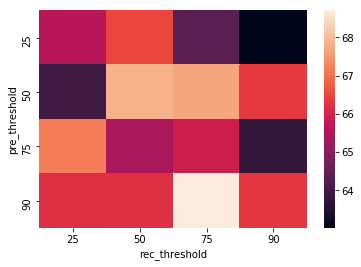

With instances sorted as True
With Early Stop set as False
object results:


f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            50             68.617560   
                                   75            75             67.244792   
                                   90            25             67.162202   
                                   50            75             66.953125   
                                   90            75             66.808780   
                                                 90             66.603423   
                                   25            25             66.534970   
                                                 75             66.299107   
                                   50            25             66.130952   
                                   25            90             65.637649   
                                   75            25             65.497024   
                                                 90             64.936756   
                                   50            50             64.917411   
                                   75            50             64.552827   
                                   25            50             63.921131   
                                   50            90             63.736607   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            50             78.320312   
                                   75            75             78.098958   
                                   90            25             78.658854   
                                   50            75             77.760417   
                                   90            75             75.937500   
                                                 90             75.885417   
                                   25            25             77.747396   
                                                 75             76.041667   
                                   50            25             76.471354   
                                   25            90             75.468750   
                                   75            25             76.875000   
                                                 90             75.781250   
                                   50            50             75.533854   
                                   75            50             75.039062   
                                   25            50             74.843750   
                                   50            90             75.598958   

                                                                   recall  \
instances_sorted early_stop type   pre_threshold rec_threshold              
True             False      object 90            50             64.505208   
                                   75            75             62.057292   
                                   90            25             62.473958   
                                   50            75             61.875000   
                                   90            75             63.229167   
                                                 90             62.994792   
                                   25            25             61.406250   
                                                 75             61.875000   
                                   50            25             61.510417   
                                   25            90             61.588542   
                                   75            25             60.546875   
                                                 90             60.104167   
                                   50            50             60.520833   
                                   75            50             59.947917   
                                   25            50        

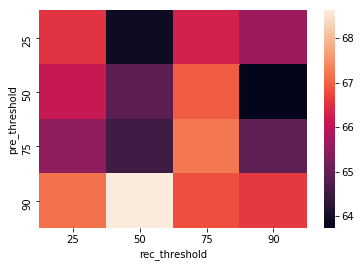

With instances sorted as False
With Early Stop set as True
object results:


f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            25             69.293527   
                                                 50             69.107143   
                                   25            90             68.964286   
                                   75            90             68.837054   
                                   50            90             68.162574   
                                   90            90             67.849330   
                                                 75             66.990327   
                                   50            50             66.325149   
                                   25            75             65.850446   
                                   75            25             65.740327   
                                   50            75             65.309524   
                                   25            50             65.261161   
                                                 25             65.049107   
                                   50            25             64.545387   
                                   75            50             64.525298   
                                                 75             64.441964   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            25             73.033854   
                                                 50             75.552083   
                                   25            90             76.346354   
                                   75            90             75.398437   
                                   50            90             76.117188   
                                   90            90             70.026042   
                                                 75             71.153646   
                                   50            50             76.432292   
                                   25            75             76.343750   
                                   75            25             75.653646   
                                   50            75             74.921875   
                                   25            50             76.184896   
                                                 25             75.520833   
                                   50            25             75.351562   
                                   75            50             74.947917   
                                                 75             73.041667   

                                                                   recall  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            True       object 90            25             72.786458   
                                                 50             68.489583   
                                   25            90             68.151042   
                                   75            90             69.583333   
                                   50            90             67.109375   
                                   90            90             74.661458   
                                                 75             69.296875   
                                   50            50             61.796875   
                                   25            75             61.770833   
                                   75            25             61.927083   
                                   50            75             61.041667   
                                   25            50             60.572917   
                                                 25             60.364583   
                                   50            25             59.739583   
                                   75            50        

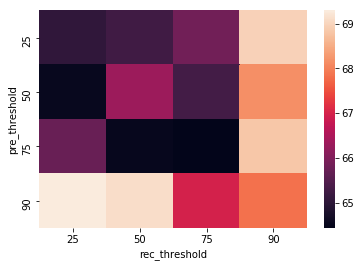

With instances sorted as False
With Early Stop set as False
object results:


f1_score  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             69.676339   
                                                 25             68.327381   
                                                 90             68.265625   
                                   25            75             67.398065   
                                   75            75             66.808780   
                                   90            75             66.552827   
                                   75            50             66.174107   
                                   25            90             66.109375   
                                   50            50             66.088542   
                                                 25             65.625000   
                                   75            90             65.533482   
                                   50            90             65.447917   
                                   25            25             65.229911   
                                   50            75             65.095982   
                                   25            50             64.950149   
                                   75            25             64.515625   

                                                                precision  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             77.643229   
                                                 25             79.192708   
                                                 90             76.458333   
                                   25            75             76.875000   
                                   75            75             76.328125   
                                   90            75             76.164062   
                                   75            50             77.552083   
                                   25            90             77.109375   
                                   50            50             76.692708   
                                                 25             75.364583   
                                   75            90             77.369792   
                                   50            90             76.848958   
                                   25            25             76.601562   
                                   50            75             76.927083   
                                   25            50             76.302083   
                                   75            25             76.718750   

                                                                   recall  \
instances_sorted early_stop type   pre_threshold rec_threshold              
False            False      object 90            50             67.057292   
                                                 25             63.880208   
                                                 90             65.208333   
                                   25            75             63.177083   
                                   75            75             62.500000   
                                   90            75             62.968750   
                                   75            50             61.093750   
                                   25            90             61.822917   
                                   50            50             61.093750   
                                                 25             61.354167   
                                   75            90             60.234375   
                                   50            90             60.468750   
                                   25            25             60.078125   
                                   50            75             60.208333   
                                   25            50        

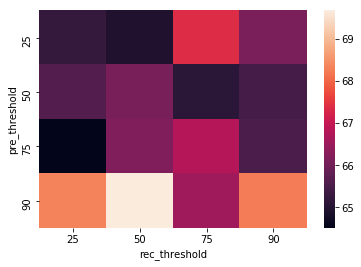

In [10]:
feature_types=["rgb","shape","object"]
early_stops=["True","False"]
instance_sorts=["True","False"]
for feature_type in feature_types:
    for instance_sort in instance_sorts:
        for early_stop in early_stops:
            print("With instances sorted as",instance_sort)
            print("With Early Stop set as",early_stop)
            print(feature_type,"results:")
            display_results(Results,feature_type,early_stop,instance_sort)